# Model ML Project: Time for Tea

## Part 1 Choose data

This project uses the time-for-tea use case to demo the process of building a complete ML project, excluding deployment.

The process is based on Chapter 2 of:

**Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow**

This is a pre-step specific to this use case where we have to choose a data set from the free data available.

## <font color='blue'>Overall Project Aim</font>

The aim of this project is to explore whether it is possible to identify kettle use from a disaggregated data set using ML algorithms. The output could be used to identify whether a person was up and active at home.

The project uses the freely available REFIT data set: https://pureportal.strath.ac.uk/en/datasets/refit-electrical-load-measurements-cleaned

Data includes energy usage of highest using appliances (expect this to be close to but no equal to total home usage). Not all data sets include kettle use, we'll only consider data sets with a kettle.

We are only interested in total consumption and kettle consumption fields. Kettles are tagged with an appliance number that varies across data sets so we need to select the correct appliance code from each data set.

## Get all Data and Choose Site to Model

In [4]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def read_and_summarise(data_path, file, kettle_col):
    
    df0 = pd.read_csv(os.path.join(data_path, file), parse_dates=True, index_col="Time")
    
    cols = ["Unix", "Aggregate", kettle_col, "Issues"]
    df = df0[cols]

    rows = df.shape[0]
    num_kettle_rows = df[df[kettle_col] > 0].shape[0]
    perc_kettle_rows = 100 * df[df[kettle_col] > 0].shape[0] / rows
    num_issue_rows = df[df["Issues"] > 0].shape[0]
    perc_issue_rows = 100 * df[df["Issues"] > 0].shape[0] / rows


    av_home_power = df["Aggregate"][df["Aggregate"] > 0].mean()
    max_home_power = df["Aggregate"].max()
    av_kettle_power = df[kettle_col][df[kettle_col] > 0].mean()
    max_kettle_power = df[kettle_col].max()
    
    df_summary = pd.DataFrame(data = {"rows": rows,
                                      "num_kettle_rows": num_kettle_rows,
                                      "perc_kettle_rows": perc_kettle_rows,
                                      "num_issue_rows": num_issue_rows,
                                      "perc_issue_rows": perc_issue_rows,
                                      "av_home_power": av_home_power,
                                      "max_home_power": max_home_power,
                                      "av_kettle_power": av_kettle_power,
                                      "max_kettle_power": max_kettle_power
                                     },
                                     index = [file])

    return df_summary

## Get a summary of all data sets available that include a kettle

In [6]:
DATA_PATH = os.path.join("REFIT_energy_data", "CLEAN_REFIT")

In [7]:
inputs = [{"file": "CLEAN_House2.csv", "kettle_col": "Appliance8"},
          {"file": "CLEAN_House3.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House4.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House5.csv", "kettle_col": "Appliance8"},
          {"file": "CLEAN_House6.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House7.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House8.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House9.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House11.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House12.csv", "kettle_col": "Appliance6"},
          {"file": "CLEAN_House13.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House17.csv", "kettle_col": "Appliance8"},
          {"file": "CLEAN_House19.csv", "kettle_col": "Appliance5"},
          {"file": "CLEAN_House20.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House21.csv", "kettle_col": "Appliance7"},  
         ]

In [13]:
df_summary_all = pd.DataFrame()

for item in inputs:
    
    print(f"processing file: {item['file']}")

    df_summary = read_and_summarise(data_path=DATA_PATH, 
                                    file=item["file"],
                                    kettle_col=item["kettle_col"])
    
    df_summary_all = pd.concat([df_summary_all, df_summary])

processing file: CLEAN_House2.csv
processing file: CLEAN_House3.csv
processing file: CLEAN_House4.csv
processing file: CLEAN_House5.csv
processing file: CLEAN_House6.csv
processing file: CLEAN_House7.csv
processing file: CLEAN_House8.csv
processing file: CLEAN_House9.csv
processing file: CLEAN_House11.csv
processing file: CLEAN_House12.csv
processing file: CLEAN_House13.csv
processing file: CLEAN_House17.csv
processing file: CLEAN_House19.csv
processing file: CLEAN_House20.csv
processing file: CLEAN_House21.csv


In [14]:
df_summary_all

,rows,num_kettle_rows,perc_kettle_rows,num_issue_rows,perc_issue_rows,av_home_power,max_home_power,av_kettle_power,max_kettle_power
CLEAN_House2.csv,5733526,58921,1.027657,28444,0.496100,465.108352,24595,2253.184824,3729
CLEAN_House3.csv,6994594,88663,1.267593,408627,5.842040,678.466601,65836,1550.115110,2277
CLEAN_House4.csv,6760511,42641,0.630736,67441,0.997573,381.219478,65663,1699.884313,2560
CLEAN_House5.csv,7430755,70524,0.949083,425766,5.729781,738.147774,41738,2351.370427,3856
CLEAN_House6.csv,6241971,67322,1.078538,34451,0.551925,482.914613,32756,2191.018850,2820
CLEAN_House7.csv,6756034,30946,0.458050,161919,2.396658,565.908879,32730,1929.980644,3968
CLEAN_House8.csv,6118469,54199,0.885826,25000,0.408599,685.620436,25358,2340.146700,3840
CLEAN_House9.csv,6169525,71297,1.155632,32226,0.522342,576.051988,28836,2357.748264,3072
CLEAN_House11.csv,4431541,52202,1.177965,40114,0.905193,461.246135,32932,1840.847439,2256
CLEAN_House12.csv,5859544,278192,4.747673,14183,0.242050,367.220921,16543,107.799592,2050


In [17]:
plt.rcParams["figure.figsize"] = (20,6)

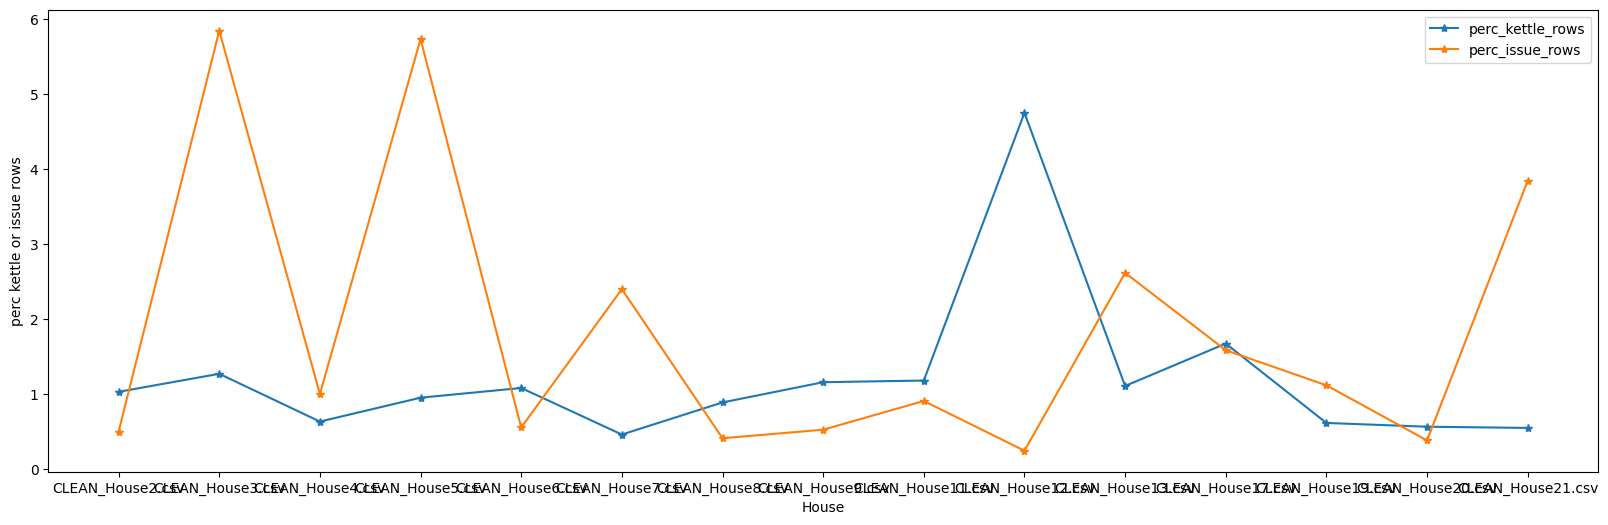

In [18]:
plt.plot(df_summary_all[["perc_kettle_rows", "perc_issue_rows"]],
         "-*",
         label = ["perc_kettle_rows", "perc_issue_rows"])
plt.xlabel("House")
plt.ylabel("perc kettle or issue rows")

plt.legend()
plt.show()

### Want high perc of kettle use and low perc of issue rows
 - House 12 looks good but the house is a bit unusual, many appliances not monitored
 - House 2 looks pretty good in terms of above and what's monitored (e.g. microwave, dishwasher etc

## Some basic data checks

In [53]:
df0 = pd.read_csv(os.path.join(DATA_PATH, 
                               "CLEAN_House2.csv"), parse_dates=True, index_col="Time")

cols = ["Aggregate", "Appliance8", "Issues"]
df = df0[cols]

In [54]:
df.dtypes

Aggregate     int64
Appliance8    int64
Issues        int64
dtype: object

In [55]:
df.describe()

,Aggregate,Appliance8,Issues
count,5.733526e+06,5.733526e+06,5.733526e+06
mean,4.651023e+02,2.315502e+01,4.960996e-03
std,1.062579e+03,2.494471e+02,7.025942e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.080000e+02,0.000000e+00,0.000000e+00
50%,1.680000e+02,0.000000e+00,0.000000e+00
75%,3.310000e+02,0.000000e+00,0.000000e+00
max,2.459500e+04,3.729000e+03,1.000000e+00


In [56]:
df.head(10)

,Aggregate,Appliance8,Issues
Time,,,
2013-09-17 22:08:11,695,0,0
2013-09-17 22:08:18,694,0,0
2013-09-17 22:08:26,694,0,0
2013-09-17 22:08:34,702,0,0
2013-09-17 22:08:42,700,0,0
2013-09-17 22:08:50,702,0,0
2013-09-17 22:08:58,696,0,0
2013-09-17 22:09:06,696,0,0
2013-09-17 22:09:11,691,0,0


In [57]:
# check for duplicate dates
df.index.has_duplicates

False

In [58]:
# check for missing data
# Data are note equally spaced, check for missing days only

print(f"start date: {df.index.min()}")
print(f"end data: {df.index.max()}")

ideal_days = len(pd.date_range(start=df.index.min(), end=df.index.max(), freq='1D'))
actual_days = len(np.unique(df.index.date))

print(f"total_days (inc partial): {actual_days}")
print(f"missing days (minimum, may be other partial days missing): {ideal_days - actual_days}")

start date: 2013-09-17 22:08:11
end data: 2015-05-28 08:05:43
total_days (inc partial): 491
missing days (minimum, may be other partial days missing): 127


In [59]:
# Ensure index is sorted by date
df.sort_index(axis=0, ascending=True, inplace=True)

In [60]:
# Export to csv
df.to_csv("house2_processed.csv")

# Combine multiple data sets

In [9]:
DATA_PATH = os.path.join("REFIT_energy_data", "CLEAN_REFIT")

In [10]:
inputs = [
          {"file": "CLEAN_House3.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House4.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House5.csv", "kettle_col": "Appliance8"},
          {"file": "CLEAN_House6.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House7.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House8.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House9.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House11.csv", "kettle_col": "Appliance7"},
          {"file": "CLEAN_House12.csv", "kettle_col": "Appliance6"},
          {"file": "CLEAN_House13.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House17.csv", "kettle_col": "Appliance8"},
          {"file": "CLEAN_House20.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House21.csv", "kettle_col": "Appliance7"},  
         ]

In [18]:
inputs = [
          {"file": "CLEAN_House3.csv", "kettle_col": "Appliance9"},
          {"file": "CLEAN_House4.csv", "kettle_col": "Appliance9"}]

In [19]:
df = pd.DataFrame()

for item in inputs:
    
    file = item['file']
    kettle_col = item['kettle_col']
    
    
    print(f"processing file: {file}")
    
    df2 = pd.read_csv(os.path.join(DATA_PATH, file), parse_dates=True, index_col="Time")
    
    cols = ["Aggregate", kettle_col, "Issues"]
    df2 = df2[cols].rename(columns = {kettle_col: 'kettle'})


    
    df = pd.concat([df, df2])

processing file: CLEAN_House3.csv
processing file: CLEAN_House4.csv


In [20]:
df

,Aggregate,kettle,Issues
Time,,,
2013-09-25 19:21:09,387,0,0
2013-09-25 19:21:16,386,0,0
2013-09-25 19:21:23,383,0,0
2013-09-25 19:21:30,388,0,0
2013-09-25 19:21:37,388,0,0
...,...,...,...
2015-07-07 09:57:10,84,0,0
2015-07-07 09:57:17,84,0,0
2015-07-07 09:57:24,84,0,0
